Create plots of model performance over a variety of spiral dataset generation parameters.

In [1]:
# from ray.tune import Analysis
import os
import glob
import json
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt

In [25]:
strResultsDir = '/archive/bioinformatics/DLLab/KevinNguyen/results/MEDL/spirals_20210719/Comparison_2021-07-21_18-15-59'

dictPerformance = {}
for strPartition in ['Test', 'Held-out group']:
    lsConfigs = glob.glob(os.path.join(strResultsDir, 'Comparison*'))

    lsPerformance = []
    for strConfigDir in lsConfigs:
        with open(os.path.join(strConfigDir, 'params.json'), 'r') as f:
            dictConfig = json.load(f)
            
        lsModels = []
        for strModel, strModelName in [('Base', 'Conventional'), ('Concat', 'Cluster input'), ('ME', 'ME-MLP')]:
            strModelPath = os.path.join(strConfigDir, strModel.lower() + '_model.csv')
            if os.path.exists(strModelPath):
                df = pd.read_csv(strModelPath, index_col=0)
                df = df[strPartition].to_frame('Accuracy')
                for strParam in dictConfig.keys():
                    df[strParam.capitalize()] = dictConfig[strParam]
                df['Model'] = strModelName
                lsModels += [df]
    
        if len(lsModels) > 0:
            lsPerformance += [pd.concat(lsModels, axis=0)]
        
    dictPerformance[strPartition] = pd.concat(lsPerformance, axis=0)

In [26]:
def plot_acc(classes=None, inter_cluster_sd=None, noise=None, degrees=None, partition='Test', ax=None):
    df = dictPerformance[partition]
    if classes:
        df = df.loc[df['Classes'] == classes]
    else:
        xaxis = 'Classes'
        xlabel = 'Spirals ($n_c$)'
    if inter_cluster_sd:
        df = df.loc[df['Inter_cluster_sd'] == inter_cluster_sd]
    else:
        xaxis = 'Inter_cluster_sd'
        xlabel = 'Random radius ($\sigma_r$)'
    if noise:
        df = df.loc[df['Noise'] == noise]
    else:
        xaxis = 'Noise'
        xlabel = 'Data noise ($\sigma_\epsilon$)'
    if degrees:
        df = df.loc[df['Degrees'] == degrees]
    else:
        xaxis = 'Degrees'
        xlabel = 'Spiral length ($d_{max}$)'
    
    if ax is None:
        ax = plt.gca()
        
    if xaxis == 'Classes':
        ax = sns.barplot(data=df, x=xaxis, y='Accuracy', hue='Model', ax=ax)
        ax.set_xlabel(xlabel)
    else:
        ax = sns.lineplot(data=df, x=xaxis, y='Accuracy', hue='Model', style='Model', ax=ax)
        ax.set_xticks(df[xaxis].unique())
        ax.set_xlabel(xlabel)
        
    return ax
        

# Accuracy on test data from seen clusters

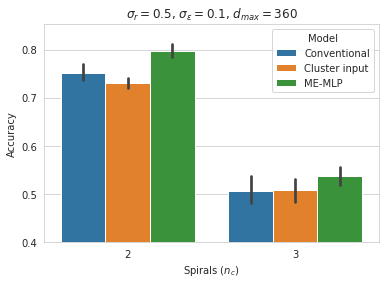

In [32]:
ax = plot_acc(inter_cluster_sd=0.5, noise=0.1, degrees=360, partition='Test')
ax.set_title('$\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$, $d_{max} = 360$')
ax.set_ylim(0.4)
plt.gcf().savefig('/home2/s169685/Downloads/classes.svg')

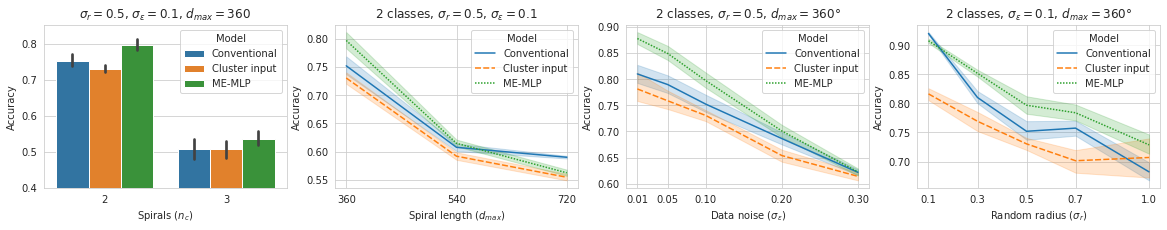

In [35]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))

plot_acc(inter_cluster_sd=0.5, noise=0.1, degrees=360, partition='Test', ax=ax[0])
ax[0].set_title('$\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$, $d_{max} = 360$')
ax[0].set_ylim(0.4)

plot_acc(classes=2, inter_cluster_sd=0.5, noise=0.1, partition='Test', ax=ax[1])
ax[1].set_title('2 classes, $\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$')

plot_acc(classes=2, inter_cluster_sd=0.5, degrees=360, partition='Test', ax=ax[2])
ax[2].set_title('2 classes, $\sigma_r = 0.5$, $d_{max} = 360\degree$')

plot_acc(classes=2, noise=0.1, degrees=360, partition='Test', ax=ax[3])
ax[3].set_title('2 classes, $\sigma_\epsilon = 0.1$, $d_{max}=360\degree$')

fig.savefig('/home2/s169685/Downloads/2spirals.svg')

Text(0.5, 1.0, '3 classes, $\\sigma_\\epsilon = 0.1$, $d_{max}=360\\degree$')

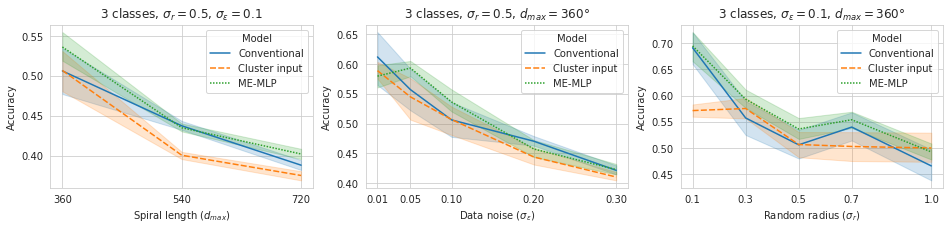

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3))

plot_acc(classes=3, inter_cluster_sd=0.5, noise=0.1, partition='Test', ax=ax[0])
ax[0].set_title('3 classes, $\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$')

plot_acc(classes=3, inter_cluster_sd=0.5, degrees=360, partition='Test', ax=ax[1])
ax[1].set_title('3 classes, $\sigma_r = 0.5$, $d_{max} = 360\degree$')

plot_acc(classes=3, noise=0.1, degrees=360, partition='Test', ax=ax[2])
ax[2].set_title('3 classes, $\sigma_\epsilon = 0.1$, $d_{max}=360\degree$')

# Accuracy on unseen clusters

(0.3, 0.883278381228447)

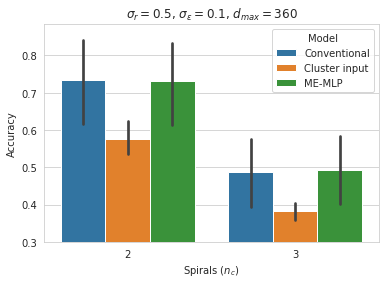

In [30]:
ax = plot_acc(inter_cluster_sd=0.5, noise=0.1, degrees=360, partition='Held-out group')
ax.set_title('$\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$, $d_{max} = 360$')
ax.set_ylim(0.3)

Text(0.5, 1.0, '2 classes, $\\sigma_\\epsilon = 0.1$, $d_{max}=360\\degree$')

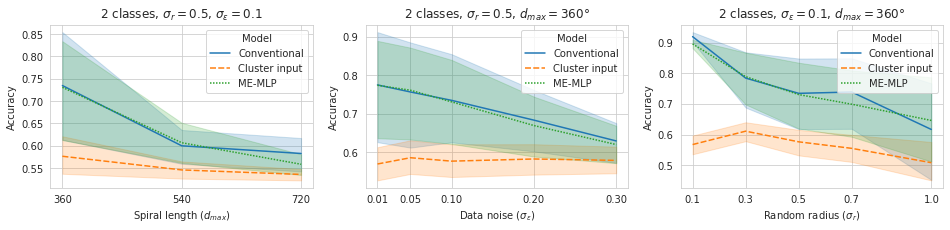

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3))

plot_acc(classes=2, inter_cluster_sd=0.5, noise=0.1, partition='Held-out group', ax=ax[0])
ax[0].set_title('2 classes, $\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$')

plot_acc(classes=2, inter_cluster_sd=0.5, degrees=360, partition='Held-out group', ax=ax[1])
ax[1].set_title('2 classes, $\sigma_r = 0.5$, $d_{max} = 360\degree$')

plot_acc(classes=2, noise=0.1, degrees=360, partition='Held-out group', ax=ax[2])
ax[2].set_title('2 classes, $\sigma_\epsilon = 0.1$, $d_{max}=360\degree$')

Text(0.5, 1.0, '3 classes, $\\sigma_\\epsilon = 0.1$, $d_{max}=360\\degree$')

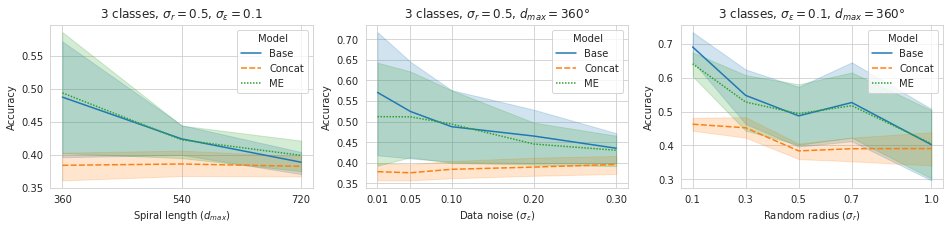

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(16, 3))

plot_acc(classes=3, inter_cluster_sd=0.5, noise=0.1, partition='Held-out group', ax=ax[0])
ax[0].set_title('3 classes, $\sigma_r = 0.5$, $\sigma_\epsilon = 0.1$')

plot_acc(classes=3, inter_cluster_sd=0.5, degrees=360, partition='Held-out group', ax=ax[1])
ax[1].set_title('3 classes, $\sigma_r = 0.5$, $d_{max} = 360\degree$')

plot_acc(classes=3, noise=0.1, degrees=360, partition='Held-out group', ax=ax[2])
ax[2].set_title('3 classes, $\sigma_\epsilon = 0.1$, $d_{max}=360\degree$')